## Project Description: Next Word Prediction Using LSTM

#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (LSTM) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: We use the text of Shakespeare's "Hamlet" as our dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.


In [13]:
# Data preprocessing
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the dataset
with open("hamlet.txt", "r") as file:
    data = file.read().lower()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

total_words = len(tokenizer.word_index) + 1

total_words

4818

In [14]:
import nltk

nltk.download("gutenberg")
from nltk.corpus import gutenberg

data = gutenberg.raw("shakespeare-hamlet.txt")
with open("hamlet.txt", "w") as file:
    file.write(data)

# Cell 2: Imports and Preprocessing
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

with open("hamlet.txt", "r") as file:
    data = file.read().lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Cell 3: Sequence Generation
all_tokens = tokenizer.texts_to_sequences([data])[0]
sequence_length = 20

input_sequences = []
for i in range(sequence_length, len(all_tokens)):
    input_sequences.append(all_tokens[i - sequence_length : i + 1])

input_sequences = np.array(input_sequences)
x, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

split_idx = int(0.8 * len(x))
X_train, X_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")
print(f"Sequence length: {X_train.shape[1]}")
print(f"Vocabulary size: {total_words}")

[nltk_data] Downloading package gutenberg to /home/mohamed-
[nltk_data]     tamer/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Training sequences: 23742
Test sequences: 5936
Sequence length: 20
Vocabulary size: 4818


In [15]:
# Better sequence generation
all_tokens = tokenizer.texts_to_sequences([data])[0]
sequence_length = 20

input_sequences = []
for i in range(sequence_length, len(all_tokens)):
    input_sequences.append(all_tokens[i - sequence_length : i + 1])

input_sequences = np.array(input_sequences)
x, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Temporal split
split_idx = int(0.8 * len(x))
X_train, X_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")

# Better model
model = Sequential(
    [
        Embedding(total_words, 256),
        LSTM(256, return_sequences=True, recurrent_dropout=0.2),
        LSTM(256, recurrent_dropout=0.2),
        Dense(512, activation="relu", kernel_regularizer="l2"),
        Dropout(0.3),
        Dense(total_words, activation="softmax"),
    ]
)

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy", TopKCategoricalAccuracy(k=5, name="top_5_acc")],
)

# Fixed callbacks - monitor accuracy, not loss
callbacks = [
    EarlyStopping(
        monitor="val_top_5_acc",
        patience=10,
        mode="max",
        restore_best_weights=True,
        verbose=1,
    ),
    ReduceLROnPlateau(
        monitor="val_top_5_acc", factor=0.5, patience=5, mode="max", verbose=1
    ),
]

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1,
)

# Evaluation
loss, accuracy, top5_acc = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")
print(f"Final Test Top-5 Accuracy: {top5_acc*100:.2f}%")
print(f"Perplexity: {np.exp(loss):.2f}")

Training sequences: 23742
Test sequences: 5936
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 37s 176ms/step - accuracy: 0.0290 - loss: 7.4458 - top_5_acc: 0.1211 - val_accuracy: 0.0376 - val_loss: 6.7966 - val_top_5_acc: 0.1201 - learning_rate: 0.0010
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.0327 - loss: 6.4571 - top_5_acc: 0.1256 - val_accuracy: 0.0253 - val_loss: 6.8437 - val_top_5_acc: 0.1191 - learning_rate: 0.0010
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 29s 158ms/step - accuracy: 0.0328 - loss: 6.3822 - top_5_acc: 0.1255 - val_accuracy: 0.0241 - val_loss: 6.9109 - val_top_5_acc: 0.1130 - learning_rate: 0.0010
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.0347 - loss: 6.3313 - top_5_acc: 0.1276 - val_accuracy: 0.0313 - val_loss: 6.9893 - val_top_5_acc: 0.1255 - learning_rate: 0.0010
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.0408 - loss: 6.2748 - top_5_acc: 0.1376 - val_accuracy: 0.0369 - val_loss: 7.0395 -

In [16]:
def predict_next_word(model, tokenizer, text, max_sequence=20):
    """Predict the next word given input text"""
    token_list = tokenizer.texts_to_sequences([text.lower()])[0]

    # Take only the last max_sequence tokens
    if len(token_list) >= max_sequence:
        token_list = token_list[-max_sequence:]

    # Pad if necessary
    token_list = tf.keras.preprocessing.sequence.pad_sequences(
        [token_list], maxlen=max_sequence, padding="pre"
    )

    # Get predictions
    predictions = model.predict(token_list, verbose=0)[0]

    # Get top 5 predictions
    top_indices = np.argsort(predictions)[-5:][::-1]

    results = []
    for idx in top_indices:
        for word, index in tokenizer.word_index.items():
            if index == idx:
                results.append((word, predictions[idx]))
                break

    return results


# Test it
test_text = "to be or not to"
predictions = predict_next_word(model, tokenizer, test_text)
print(f"\nInput: '{test_text}'")
print("Top 5 predictions:")
for word, prob in predictions:
    print(f"  {word}: {prob*100:.2f}%")


Input: 'to be or not to'
Top 5 predictions:
  my: 1.61%
  the: 1.48%
  a: 1.46%
  not: 1.22%
  be: 1.04%


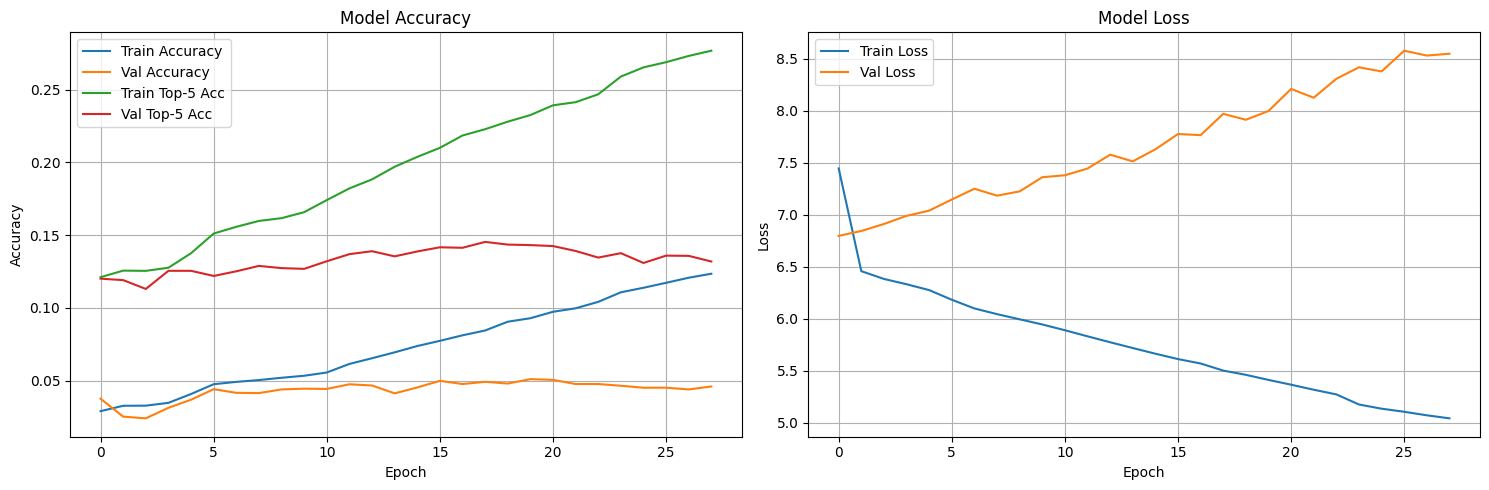

In [17]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history["accuracy"], label="Train Accuracy")
ax1.plot(history.history["val_accuracy"], label="Val Accuracy")
ax1.plot(history.history["top_5_acc"], label="Train Top-5 Acc")
ax1.plot(history.history["val_top_5_acc"], label="Val Top-5 Acc")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend()
ax1.set_title("Model Accuracy")
ax1.grid(True)

# Plot loss
ax2.plot(history.history["loss"], label="Train Loss")
ax2.plot(history.history["val_loss"], label="Val Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.set_title("Model Loss")
ax2.grid(True)

plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches="tight")
plt.show()

In [18]:
# Save the model
model.save("next_word_lstm.h5")

# Save the tokenizer
import pickle

with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)